In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from random import choices, sample
from gensim.models import Word2Vec
import gc
pd.set_option('display.float_format',lambda x : '%.2f' % x)
from math import log10

In [2]:
with open('./NN_result/lt_df_NN_rank_122days.pkl', 'rb') as file:
    lt_df_NN_rank = pickle.load(file)

In [3]:
full_table = pd.concat(lt_df_NN_rank[15:15+54], ignore_index=True)

In [4]:
full_table

,target,next,rank,NN_rank
0,102ca9ccb86811e9b0f5acde48001122,e360cdcab86611e987efacde48001122,10.00,32
1,e360cdcab86611e987efacde48001122,06fb62c2b86711e9867dacde48001122,4.00,13
2,baaadc26b86711e9b9cbacde48001122,e353a26cb86611e992e5acde48001122,60.00,29
3,e353a26cb86611e992e5acde48001122,e35fafb4b86611e99d1dacde48001122,59.00,17
4,e336d7e2b86611e9a7f7acde48001122,e3875b18b86611e9bab5acde48001122,40.00,34
...,...,...,...,...
2176234,17a1fbf4b86711e98eb1acde48001122,1794c89eb86711e99a2eacde48001122,3.00,1
2176235,1794c89eb86711e99a2eacde48001122,5ba15890b86711e9ab99acde48001122,1.00,1
2176236,e33344e8b86611e98696acde48001122,e36092b0b86611e98917acde48001122,6.00,8
2176237,e34457bab86611e9a371acde48001122,17aee940b86711e9a801acde48001122,7.00,12


In [5]:
full_table.describe()

,rank,NN_rank
count,2176239.00,2176239.00
mean,20.54,20.81
std,24.51,22.82
min,1.00,1.00
25%,3.00,4.00
50%,9.00,11.00
75%,30.00,31.00
max,99.00,99.00


In [6]:
table_grby = full_table.groupby(['target', 'next'])
pd.DataFrame(table_grby.size())

0
target                           next                               
008f3dccb86811e9b6c1acde48001122 baaf46eeb86711e9ae53acde48001122  3
                                 baaf4748b86711e99ebaacde48001122  2
008f3e76b86811e98317acde48001122 46f727eeb86711e9bb35acde48001122  1
                                 6c63b66eb86711e99a23acde48001122  1
                                 6c63b830b86711e9be7eacde48001122  1
...                                                               ..
f945b88ab86b11e99cacacde48001122 0b7ffe7ab86c11e9875dacde48001122  1
                                 e74a4698b86b11e9929dacde48001122  1
                                 f945b934b86b11e9a31bacde48001122  1
f945b934b86b11e9a31bacde48001122 90ead45eb86711e98b49acde48001122  1
f945b9deb86b11e9b55facde48001122 f945b88ab86b11e99cacacde48001122  1

[1047760 rows x 1 columns]

In [7]:
df_table  = pd.merge(pd.DataFrame(table_grby.size()), full_table, on=['target', 'next'], how='left')

In [8]:
df_table.rename(columns = {0:'occur'}, inplace=True)

In [9]:
df_table.drop_duplicates(inplace=True, ignore_index=True)
df_table

,target,next,occur,rank,NN_rank
0,008f3dccb86811e9b6c1acde48001122,baaf46eeb86711e9ae53acde48001122,3,2.00,1
1,008f3dccb86811e9b6c1acde48001122,baaf4748b86711e99ebaacde48001122,2,1.00,4
2,008f3e76b86811e98317acde48001122,46f727eeb86711e9bb35acde48001122,1,41.00,40
3,008f3e76b86811e98317acde48001122,6c63b66eb86711e99a23acde48001122,1,2.00,2
4,008f3e76b86811e98317acde48001122,6c63b830b86711e9be7eacde48001122,1,6.00,6
...,...,...,...,...,...
1047755,f945b88ab86b11e99cacacde48001122,0b7ffe7ab86c11e9875dacde48001122,1,1.00,19
1047756,f945b88ab86b11e99cacacde48001122,e74a4698b86b11e9929dacde48001122,1,7.00,20
1047757,f945b88ab86b11e99cacacde48001122,f945b934b86b11e9a31bacde48001122,1,5.00,64
1047758,f945b934b86b11e9a31bacde48001122,90ead45eb86711e98b49acde48001122,1,16.00,25


In [10]:
df_table.describe()

,occur,rank,NN_rank
count,1047760.00,1047760.00,1047760.00
mean,2.08,25.09,25.47
std,6.92,26.33,24.70
min,1.00,1.00,1.00
25%,1.00,4.00,5.00
50%,1.00,14.00,17.00
75%,2.00,39.00,39.00
max,2244.00,99.00,99.00


In [11]:
df_table.groupby('occur').mean().describe()

,rank,NN_rank
count,250.00,250.00
mean,9.95,9.07
std,12.27,9.00
min,1.00,1.00
25%,2.00,3.00
50%,7.19,6.94
75%,13.00,12.27
max,94.00,69.00


In [12]:
# df_table.groupby('occur').mean().to_csv('result_-107days.csv')

In [13]:
# df_table.groupby('occur').mean().plot(figsize=(20,10))[:100]

---

In [15]:
df_table['label'] = df_table.apply(lambda df: df['rank'] > df['NN_rank'], axis=1)

In [16]:
df_table['X_1'] = df_table.apply(lambda df: 1-df['rank']/100, axis=1)

In [17]:
df_table

,target,next,occur,rank,NN_rank,label,X_1
0,008f3dccb86811e9b6c1acde48001122,baaf46eeb86711e9ae53acde48001122,3,2.00,1,True,0.98
1,008f3dccb86811e9b6c1acde48001122,baaf4748b86711e99ebaacde48001122,2,1.00,4,False,0.99
2,008f3e76b86811e98317acde48001122,46f727eeb86711e9bb35acde48001122,1,41.00,40,True,0.59
3,008f3e76b86811e98317acde48001122,6c63b66eb86711e99a23acde48001122,1,2.00,2,False,0.98
4,008f3e76b86811e98317acde48001122,6c63b830b86711e9be7eacde48001122,1,6.00,6,False,0.94
...,...,...,...,...,...,...,...
1047755,f945b88ab86b11e99cacacde48001122,0b7ffe7ab86c11e9875dacde48001122,1,1.00,19,False,0.99
1047756,f945b88ab86b11e99cacacde48001122,e74a4698b86b11e9929dacde48001122,1,7.00,20,False,0.93
1047757,f945b88ab86b11e99cacacde48001122,f945b934b86b11e9a31bacde48001122,1,5.00,64,False,0.95
1047758,f945b934b86b11e9a31bacde48001122,90ead45eb86711e98b49acde48001122,1,16.00,25,False,0.84


In [18]:
df_table.describe()

,occur,rank,NN_rank,X_1
count,1047760.00,1047760.00,1047760.00,1047760.00
mean,2.08,25.09,25.47,0.75
std,6.92,26.33,24.70,0.26
min,1.00,1.00,1.00,0.01
25%,1.00,4.00,5.00,0.61
50%,1.00,14.00,17.00,0.86
75%,2.00,39.00,39.00,0.96
max,2244.00,99.00,99.00,0.99


In [19]:
df_table.nunique()

target     252463
next       259278
occur         250
rank           99
NN_rank        99
label           2
X_1            99
dtype: int64

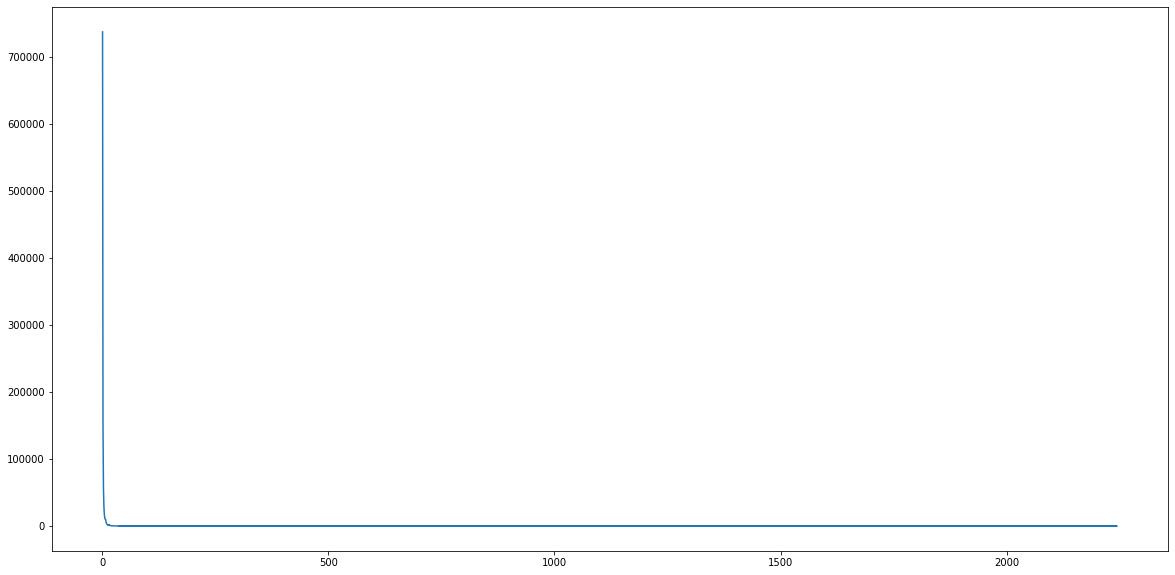

In [20]:
df_table['occur'].value_counts().plot(figsize=(20,10))

In [22]:
df_table['occur'].value_counts()

1      737186
2      147373
3       56332
4       28976
5       17271
        ...  
185         1
183         1
182         1
180         1
499         1
Name: occur, Length: 250, dtype: int64

In [75]:
max_occur = max(df_table['occur'])
df_table['occur'].value_counts().apply(lambda x : log10(x)/log10(max_occur))

1      1.80
2      1.61
3      1.49
4      1.41
5      1.35
       ... 
274    0.00
272    0.00
268    0.00
267    0.00
1010   0.00
Name: occur, Length: 354, dtype: float64

In [24]:
pd.set_option('display.max_rows', 250)
max_occur = max(df_table['occur'])
df_occur = pd.DataFrame({'counts':df_table['occur'].value_counts(), 'log10':df_table['occur'].value_counts().apply(lambda x : log10(x)/log10(max_occur))}).reset_index()
df_occur.rename(columns = {'index':'occur'}, inplace=True)
max_log10 = max(df_occur['log10'])
df_occur['log10R'] = df_occur['log10'].apply(lambda x: max_log10-x)

In [25]:
from sklearn import preprocessing
Min_Max_Scaler = preprocessing.MinMaxScaler( feature_range=(0,1) ) # 設定縮放的區間上下限
MinMax_Data = Min_Max_Scaler.fit_transform( df_occur['log10R'].to_numpy().reshape(-1, 1) ) # Data 為原始資料

In [26]:
df_occur['log10R_MinMax'] = pd.DataFrame(MinMax_Data)

In [27]:
pd.set_option('display.float_format',lambda x : '%.2f' % x)
df_occur

,occur,counts,log10,log10R,log10R_MinMax
0,1,737186,1.75,0.00,0.00
1,2,147373,1.54,0.21,0.12
2,3,56332,1.42,0.33,0.19
3,4,28976,1.33,0.42,0.24
4,5,17271,1.26,0.49,0.28
5,6,11657,1.21,0.54,0.31
6,7,10244,1.20,0.55,0.32
7,8,9399,1.19,0.57,0.32
8,9,5081,1.11,0.65,0.37
9,10,3607,1.06,0.69,0.39


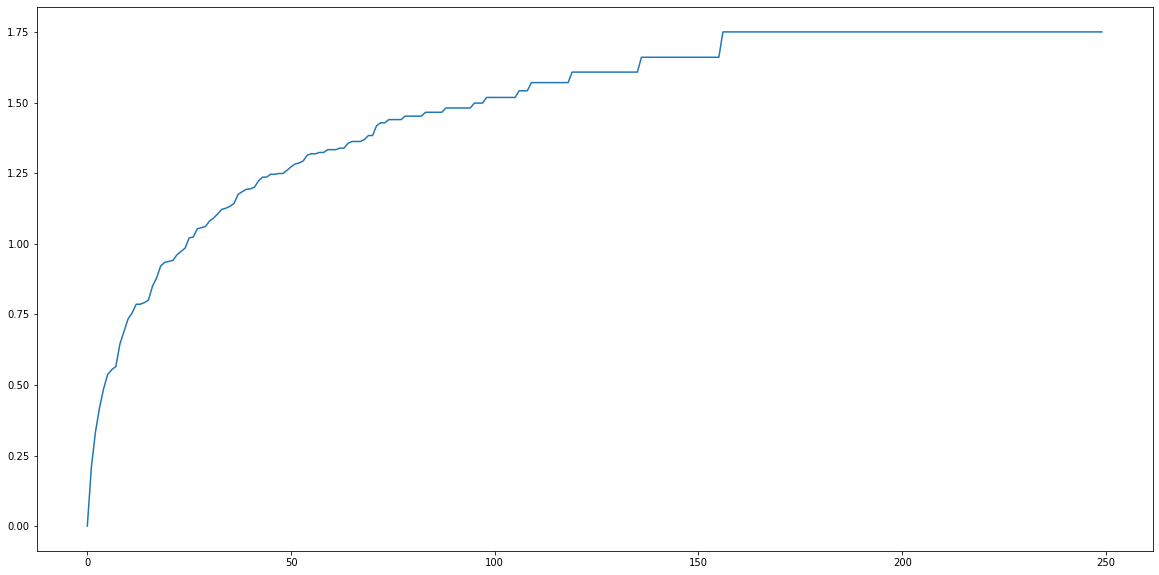

In [28]:
df_occur['log10R'].plot(figsize=(20,10))

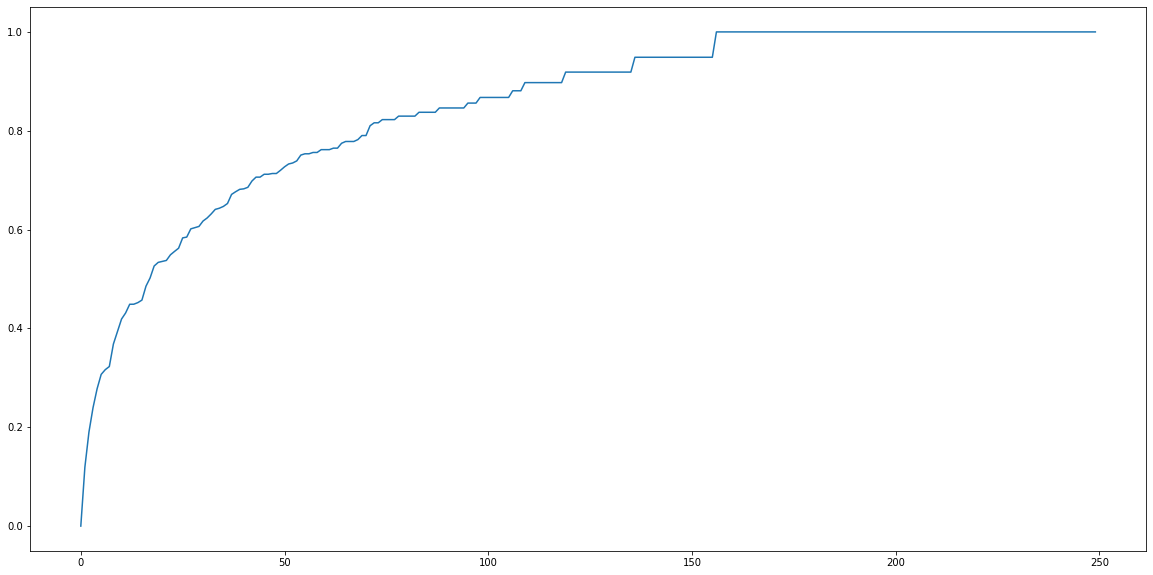

In [29]:
df_occur['log10R_MinMax'].plot(figsize=(20,10))

---

In [30]:
df_occur.drop(['counts', 'log10', 'log10R'], axis=1, inplace=True)
df_occur

,occur,log10R_MinMax
0,1,0.00
1,2,0.12
2,3,0.19
3,4,0.24
4,5,0.28
5,6,0.31
6,7,0.32
7,8,0.32
8,9,0.37
9,10,0.39


In [31]:
df_table_ok = df_table.join(df_occur.set_index('occur'), on='occur').rename(columns = {'log10R_MinMax':'X_2'})

In [32]:
df_table_ok

,target,next,occur,rank,NN_rank,label,X_1,X_2
0,008f3dccb86811e9b6c1acde48001122,baaf46eeb86711e9ae53acde48001122,3,2.00,1,True,0.98,0.19
1,008f3dccb86811e9b6c1acde48001122,baaf4748b86711e99ebaacde48001122,2,1.00,4,False,0.99,0.12
2,008f3e76b86811e98317acde48001122,46f727eeb86711e9bb35acde48001122,1,41.00,40,True,0.59,0.00
3,008f3e76b86811e98317acde48001122,6c63b66eb86711e99a23acde48001122,1,2.00,2,False,0.98,0.00
4,008f3e76b86811e98317acde48001122,6c63b830b86711e9be7eacde48001122,1,6.00,6,False,0.94,0.00
...,...,...,...,...,...,...,...,...
1047755,f945b88ab86b11e99cacacde48001122,0b7ffe7ab86c11e9875dacde48001122,1,1.00,19,False,0.99,0.00
1047756,f945b88ab86b11e99cacacde48001122,e74a4698b86b11e9929dacde48001122,1,7.00,20,False,0.93,0.00
1047757,f945b88ab86b11e99cacacde48001122,f945b934b86b11e9a31bacde48001122,1,5.00,64,False,0.95,0.00
1047758,f945b934b86b11e9a31bacde48001122,90ead45eb86711e98b49acde48001122,1,16.00,25,False,0.84,0.00


In [33]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split

X = df_table_ok.loc[:,['X_1','X_2']]
y = df_table_ok['label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [34]:
#使用決策樹演算法
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
#評估決策樹模型好壞
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.72      0.78      0.75    175263
        True       0.69      0.62      0.66    139065

    accuracy                           0.71    314328
   macro avg       0.71      0.70      0.70    314328
weighted avg       0.71      0.71      0.71    314328



In [36]:
print(confusion_matrix(y_test,predictions))

[[136654  38609]
 [ 52186  86879]]


---

In [37]:
#使用隨機森林與決策樹做比較
from sklearn.ensemble import RandomForestClassifier

#n_estimator代表要使用多少CART樹（CART樹為使用GINI算法的決策樹）
rfc = RandomForestClassifier(n_estimators=100)

#從訓練組資料中建立隨機森林模型
rfc.fit(X_train,y_train)

rfc_pred = rfc.predict(X_test)

In [38]:
#利用classification report來看precision、recall、f1-score、support
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

       False       0.72      0.78      0.75    175263
        True       0.69      0.63      0.66    139065

    accuracy                           0.71    314328
   macro avg       0.71      0.70      0.70    314328
weighted avg       0.71      0.71      0.71    314328



In [39]:
#利用confusion matrix來看實際及預測的差異
print(confusion_matrix(y_test,rfc_pred))

[[136541  38722]
 [ 52004  87061]]


---

In [40]:
full_table = pd.concat(lt_df_NN_rank[15:], ignore_index=True)

In [41]:
table_grby = full_table.groupby(['target', 'next'])
# pd.DataFrame(table_grby.size())

In [42]:
df_table  = pd.merge(pd.DataFrame(table_grby.size()), full_table, on=['target', 'next'], how='left')

In [43]:
df_table.rename(columns = {0:'occur'}, inplace=True)

In [44]:
df_table.drop_duplicates(inplace=True, ignore_index=True)
# df_table

In [45]:
df_table['label'] = df_table.apply(lambda df: df['rank'] > df['NN_rank'], axis=1)

In [46]:
df_table['X_1'] = df_table.apply(lambda df: 1-df['rank']/100, axis=1)

In [47]:
# pd.set_option('display.max_rows', 250)
max_occur = max(df_table['occur'])
df_occur = pd.DataFrame({'counts':df_table['occur'].value_counts(), 'log10':df_table['occur'].value_counts().apply(lambda x : log10(x)/log10(max_occur))}).reset_index()
df_occur.rename(columns = {'index':'occur'}, inplace=True)
max_log10 = max(df_occur['log10'])
df_occur['log10R'] = df_occur['log10'].apply(lambda x: max_log10-x)

In [48]:
from sklearn import preprocessing
Min_Max_Scaler = preprocessing.MinMaxScaler( feature_range=(0,1) ) # 設定縮放的區間上下限
MinMax_Data = Min_Max_Scaler.fit_transform( df_occur['log10R'].to_numpy().reshape(-1, 1) ) # Data 為原始資料

In [49]:
df_occur['log10R_MinMax'] = pd.DataFrame(MinMax_Data)

In [50]:
df_occur.drop(['counts', 'log10', 'log10R'], axis=1, inplace=True)
# df_occur

In [51]:
df_table_ok = df_table.join(df_occur.set_index('occur'), on='occur').rename(columns = {'log10R_MinMax':'X_2'})

In [65]:
# 1047760 -54days
df_table_testday = pd.DataFrame(df_table_ok[1047760:])
df_table_testday

,target,next,occur,rank,NN_rank,label,X_1,X_2
1047760,e32daaeeb86611e982d0acde48001122,e3332654b86611e993f1acde48001122,1,80.00,30,True,0.20,0.00
1047761,e32daaeeb86611e982d0acde48001122,e3346e1ab86611e98935acde48001122,1,69.00,36,True,0.31,0.00
1047762,e32daaeeb86611e982d0acde48001122,e33f600cb86611e9bc06acde48001122,1,63.00,39,True,0.37,0.00
1047763,e32daaeeb86611e982d0acde48001122,e346187ab86611e9af25acde48001122,1,33.00,14,True,0.67,0.00
1047764,e32daaeeb86611e982d0acde48001122,e34c0282b86611e9ba80acde48001122,3,12.00,9,True,0.88,0.17
...,...,...,...,...,...,...,...,...
1595320,fbd89552b86d11e9bb6cacde48001122,1776586eb86711e999d4acde48001122,2,22.00,1,True,0.78,0.11
1595321,fbd95d02b86d11e9b61facde48001122,b8b2a0f4b86c11e9931aacde48001122,1,1.00,2,False,0.99,0.00
1595322,fbd99254b86d11e98d74acde48001122,577857a8b86c11e9b0b1acde48001122,1,6.00,39,False,0.94,0.00
1595323,fbd99254b86d11e98d74acde48001122,78661a8cb86811e99421acde48001122,1,2.00,25,False,0.98,0.00


In [66]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split

X = df_table_testday.loc[:,['X_1','X_2']]
y = df_table_testday['label']

---

In [67]:
#評估決策樹模型好壞
predictions = dtree.predict(X)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y,predictions))

              precision    recall  f1-score   support

       False       0.73      0.72      0.72    291597
        True       0.68      0.69      0.69    255968

    accuracy                           0.71    547565
   macro avg       0.70      0.71      0.70    547565
weighted avg       0.71      0.71      0.71    547565



In [68]:
print(confusion_matrix(y,predictions))

[[209181  82416]
 [ 78595 177373]]


---

In [69]:
rfc_pred = rfc.predict(X)
#利用classification report來看precision、recall、f1-score、support
print(classification_report(y,rfc_pred))

              precision    recall  f1-score   support

       False       0.73      0.72      0.72    291597
        True       0.68      0.69      0.69    255968

    accuracy                           0.71    547565
   macro avg       0.71      0.71      0.71    547565
weighted avg       0.71      0.71      0.71    547565



In [70]:
#利用confusion matrix來看實際及預測的差異
print(confusion_matrix(y,rfc_pred))

[[208883  82714]
 [ 78082 177886]]


---

In [71]:
df_table_testday['pred'] = predictions

In [72]:
df_table_testday['switch'] = df_table_testday.apply(lambda df: df['NN_rank'] if df['pred'] else df['rank'], axis=1)

In [73]:
df_table_testday

,target,next,occur,rank,NN_rank,label,X_1,X_2,pred,switch
1047760,e32daaeeb86611e982d0acde48001122,e3332654b86611e993f1acde48001122,1,80.00,30,True,0.20,0.00,True,30.00
1047761,e32daaeeb86611e982d0acde48001122,e3346e1ab86611e98935acde48001122,1,69.00,36,True,0.31,0.00,True,36.00
1047762,e32daaeeb86611e982d0acde48001122,e33f600cb86611e9bc06acde48001122,1,63.00,39,True,0.37,0.00,True,39.00
1047763,e32daaeeb86611e982d0acde48001122,e346187ab86611e9af25acde48001122,1,33.00,14,True,0.67,0.00,True,14.00
1047764,e32daaeeb86611e982d0acde48001122,e34c0282b86611e9ba80acde48001122,3,12.00,9,True,0.88,0.17,False,12.00
...,...,...,...,...,...,...,...,...,...,...
1595320,fbd89552b86d11e9bb6cacde48001122,1776586eb86711e999d4acde48001122,2,22.00,1,True,0.78,0.11,True,1.00
1595321,fbd95d02b86d11e9b61facde48001122,b8b2a0f4b86c11e9931aacde48001122,1,1.00,2,False,0.99,0.00,False,1.00
1595322,fbd99254b86d11e98d74acde48001122,577857a8b86c11e9b0b1acde48001122,1,6.00,39,False,0.94,0.00,False,6.00
1595323,fbd99254b86d11e98d74acde48001122,78661a8cb86811e99421acde48001122,1,2.00,25,False,0.98,0.00,False,2.00


In [74]:
df_table_testday.describe()

,occur,rank,NN_rank,X_1,X_2,switch
count,547565.00,547565.00,547565.00,547565.00,547565.00,547565.00
mean,2.98,28.47,27.71,0.72,0.08,22.46
std,8.18,27.01,24.87,0.27,0.13,23.79
min,1.00,1.00,1.00,0.01,0.00,1.00
25%,1.00,6.00,7.00,0.55,0.00,5.00
50%,1.00,19.00,20.00,0.81,0.00,13.00
75%,2.00,45.00,43.00,0.94,0.11,32.00
max,1797.00,99.00,99.00,0.99,1.00,99.00
